<img src="https://i.imgur.com/olPPiRS.jpg" alt="Texto alternativo da imagem" style="float:left; margin-right:10px;" />

<h3 style="margin-left:150px; margin-right:10px;"> Instituto Federal de Educação, Ciência e Tecnologia de Minas Gerais
Campus Ibirité<h3>

<br></br>
* Autor: Pablo Teodoro Monteiro 
> Engenharia de Controle e Automação - IFMG
>> Cálculo Numérico
>>> Atividade 08

In [80]:
#1
import pandas as pd
import numpy as np

def linearSolver(A):
    n = len(A)
    #---------------------------inicio pivotamento----------------------
    for i in range(n-1):
            #-------------
        p = i
        while p<n and A[p,i]==0:
            p = p + 1
            if(p == n):
                return "NÃO EXISTE SOLUÇÃO ÚNICA"
            #-------------
        if p != i:
            aux = np.copy(A[p,:])
            A[p,:] = np.copy(A[i,:])
            A[i,:] = aux
            #-------------
        for j in range(i+1,n):
            #print(f'A[{j},{i}]={A[j,i]} e B[{i},{i}]={A[i,i]}')    #-----------------------PRINT DE VERIFICAÇÃO DOS TESTES-------------------------------
            #print(f'q = {A[j,i]}/{A[i,i]} = {A[j,i]/A[i,i]}; j={j}, i={i}')
            q = A[j,i]/A[i,i]
            #print(f'A[j,:] = {A[j,:]} = {A[j,:]} - {q} * {A[i,:]}')
            A[j,:] = A[j,:] - q*A[i,:]
        #print(A)                                               #-----------------------PRINT DE VERIFICAÇÃO DOS TESTES-------------------------------
    #---------------------------fim pivotamento--------------------------
    if(A[n-1][n-1]==0):
        return "NÃO EXISTE SOLUÇÃO ÚNICA"

    x = A[n-1,n]/A[n-1,n-1]     #primeiro coeficiente, ultima linha

    X = np.empty(n)             #cria um array tamanho n vazio para armazenar os resultados
    X[n-1] = x

    for i in range(n):
        m = n - i-1
        X[m] = (A[m][n] - sum(A[m][k] * X[k] for k in range(m+1, n))) / A[m][m]
    return X

[1. 1.]
NÃO EXISTE SOLUÇÃO ÚNICA
NÃO EXISTE SOLUÇÃO ÚNICA


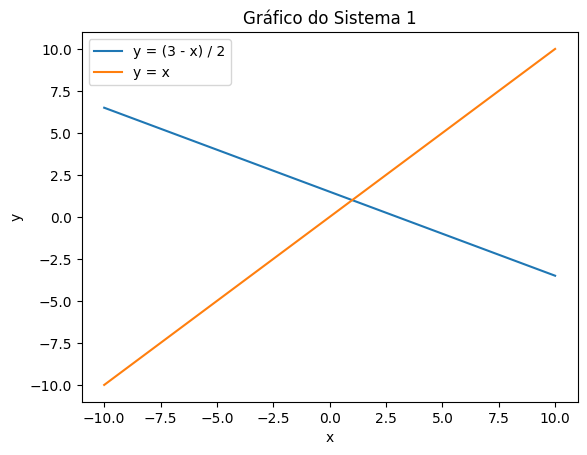

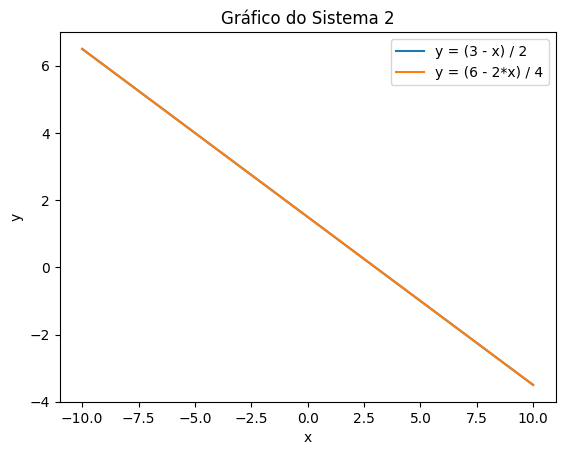

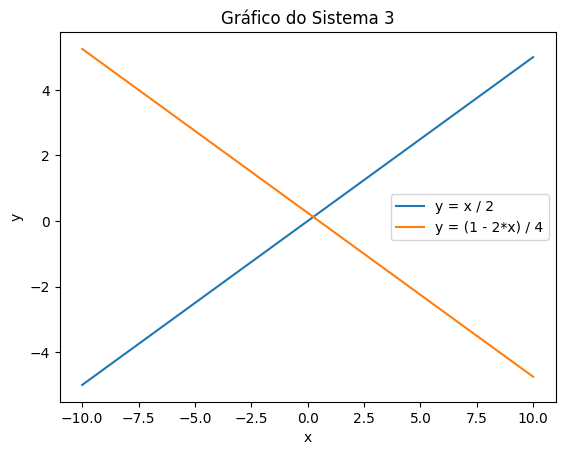

In [81]:
#2
import matplotlib.pyplot as plt

a = np.array([[1., 2, 3],[1, -1, 0]])
b = np.array([[1., 2, 3],[2, 4, 6]])
c = np.array([[1., 2, 0],[2, 4, 1]])

Sa = linearSolver(a)
Sb = linearSolver(b)
Sc = linearSolver(c)

print(f'{Sa}')
print(f'{Sb}')
print(f'{Sc}')

Mat = [
    lambda x: (3 - x) / 2,
    lambda x: x,
    lambda x: (3 - x) / 2,
    lambda x: (6 - 2*x) / 4,
    lambda x: x / 2,
    lambda x: (1 - 2*x) / 4
]
#print(len(Mat))
mat = [
    'y = (3 - x) / 2',
    'y = x',
    'y = (3 - x) / 2',
    'y = (6 - 2*x) / 4',
    'y = x / 2',
    'y = (1 - 2*x) / 4'
]

for i in range(3):
    x = np.linspace(-10, 10)
    plt.plot(x, Mat[i*2](x), label=f'{mat[i*2]}')
    plt.plot(x, Mat[i*2 + 1](x), label=f'{mat[i*2 + 1]}')
    # Titulos dos eixos, gráfico e a legenda
    plt.title(f'Gráfico do Sistema {i+1}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    # Exibir gráfico
    plt.show()


#----------------VERIFICAÇÃO COM LINALG-------------
#A = np.array([[1., 2], [1, -1]])
#B = np.array([[1., 2], [2, 4]])
#C = np.array([[1., 2], [2, 4]])

#AA = np.array([3, 0])
#BB = np.array([3, 6])
#CC = np.array([0, 1])

#np.linalg.solve(A, AA)
#np.linalg.solve(B, BB)
#np.linalg.solve(C, CC)

In [82]:
#3
a = np.array([[(1/4), (1/5), (1/6), 9], [(1/3), (1/4), (1/5), 8], [(1/2), 1, 2, 8]])
b = np.array([[3.333, 15.920, -10.333, 15.913], [2.222, 16.71, 9.612, 28.544], [1.5611, 5.1791, 1.6852, 8.4254]])
c = np.array([[(1), (1/2), (1/3), (1/4), (1/6)], [(1/2), (1/3), (1/4), (1/5), (1/7)], [(1/3), (1/4), (1/5), (1/6), (1/8)], [(1/4), (1/5), (1/6), (1/7), (1/9)]])
d = np.array([[2., 1, -1, 1, -3, 7],[1, 0, 2, -1, 1, 2], [0, -2, -1, 1, -1, -5], [3, 1, -4, 0, 5, 6], [1, -1, -1, -1, 1, 3]])
Matrizes = [a, b, c, d]

for matrix in Matrizes:
    result = linearSolver(matrix)
    print(result)

# soluções da função np.linalg.solve:
#a) [-227.07692308  476.92307692 -177.69230769]
#b) [0.41358627 1.30540797 0.60462382]
#c) [-0.03174603  0.5952381  -2.38095238  2.77777778]
#d) [ 1.91812865  1.96491228 -0.98830409 -3.19298246 -1.13450292]

[-227.07692308  476.92307692 -177.69230769]
[0.41358627 1.30540797 0.60462382]
[-0.03174603  0.5952381  -2.38095238  2.77777778]
[ 1.91812865  1.96491228 -0.98830409 -3.19298246 -1.13450292]
